<a href="https://colab.research.google.com/github/Eze-Mz/trabajos-diplo-grupo9/blob/main/Grupo_9_Entregable_1_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

##**Edición 2024**

---

# Trabajo práctico entregable - Parte 2

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn as sns
import plotly.express as px

pd.set_option('display.float_format', '{:.2f}'.format)
#seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.00,520000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.00,520000.00,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.00,104000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
alpha = 0.05

In [ ]:
df["profile_g"]

,profile_g
0,Varón cis
1,Varón cis
2,Mujer cis
3,Mujer cis
4,Varón cis
...,...
5800,Hombre
5801,Prefiero no decir
5802,Varón cis
5803,Varón cis


In [ ]:
is_man = df.profile_g == 'Varón cis'
not_man = (df.profile_g == 'Mujer cis') | (df.profile_g == 'Diversidades')

In [ ]:
not_man

,profile_g
0,False
1,False
2,True
3,True
4,False
...,...
5800,False
5801,False
5802,False
5803,False


Encontramos que hay dos valores extraños por arriba de los 10 millones, por lo tanto vamos a poner este valor como cota superior

In [ ]:
#groupA = df[(df.salary_monthly_NETO > 10000) & is_man].salary_monthly_NETO
groupA = df[(df.salary_monthly_NETO > 10000) & (df.salary_monthly_NETO < 10000000) & is_man].salary_monthly_NETO
groupB = df[(df.salary_monthly_NETO > 10000) & not_man].salary_monthly_NETO

## Ejercicio 1: Estimación

**Consigna:**  Calcular una estimación puntual y un intervalo de confianza de nivel (1-alpha) para la resta entre la media del salario Neto para Hombres menos la media del salario Neto para otros géneros(diferencia de las medias entre el grupoA y grupoB).
¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

### Disgreción teórica

Tenemos una muestra de los sueldos de personas que trabajan en IT que podemos dividir en dos de acuerdo al género:
- $X_1, X_2, \cdots, X_{n_1}$,  donde $X_i = \{\text{sueldo de persona de género masculino que trabaja en IT}\}$
- $W_1, W_2, \cdots, W_{n_2}$,  donde $W_i = \{\text{sueldo de persona de género no masculino que trabaja en IT}\}$

Como se ha mencionado en otros casos, sabemos que ser trata de un estudio observacional por lo tanto tiene limitaciones en cuanto a al representatividad de la muestra. No se trata de una muestra aleatoria, si no que se trata de aquellos quienes quisieron responder, depende de que les haya llegado la encuesta, de por quién les haya llegado, tal vez encontramos que se difundió en una empresa y hay varias respuestas de esa empresa en particular, incluso esto no lo podemos saber. Por lo tanto hay que tenerlo en cuenta al momento de sacar cualquier conclusión.

Por un lado podemos calcular la media muestral para las personas que trabajan en IT, de acuerdo a las variables que hemos propuesto, sería:

$$ \text{media muestral general } = \frac{\sum_{i=1}^{n_1} X_i+\sum_{j=1}^{n_2}W_j}{n_1+n_2}$$

A su vez tenemos las medias muestrales para cada categoría de género que definimos:

$$ \overline{X} = \frac{\sum_{i=1}^{n_1} X_i}{n_1} $$

$$ \overline{W} = \frac{\sum_{j=1}^{n_2}W_j}{n_2} $$

Sabemos que la media muestral (estadístico) es un estimador consistente, insesgado y eficiente (exacto y preciso) de la media poblacional (parámetro).
- Es un estimador insesgado dado que **si las $Y_i$ son iid (independientes idénticamente distribuidas)** se cumple que $E(\overline{Y}_m)=μ$
- Bajo un modelo paramétrico regular (Normal, Poisson, Binomial, Exponencial, Gamma con parámetro de forma conocido) es **eficiente exacto** (Uniformly Minimum Variance Unbiased Estimator -UMVUE- que alcanza Cramér-Rao Lower Bound -CRLB-), sin más supuestos es **asintóticamente eficiente** en el sentido de varianza mínima en la escala $sqrt{m}$.
- La consistencia se deriva de que la media muestral converge en probabilidad a la media poblacional:

$$ \overline{Y}_m = \frac{\sum_{i=1}^{m} Y_i}{m} \xrightarrow{P} \mu$$ Por Ley de los Grandes Números la media muestral tiende en probabilidad a la media poblacional, es decir, a medida que crece el $m$ el valor de la media muestral se acerca más y más a la media poblacional. En términos de la definición de convergencia en probabilidad tenemos qué:
$$P(|\overline{Y}_m - \mu| \leq \varepsilon) \xrightarrow[m \to \infty]{\;}  1$$
Esto es, a medida que el m crece (que el tamaño de la muestra crece) la diferencia de la media muestral con la media poblacional se ve acotada por un valor $ɛ$ con una probabilidad de 1. **Para cualquier $ɛ > 0$ la probabilidad de que $\overline{Y}_m$ caiga dentro del intervalo $[\mu-ɛ,\mu+ɛ]$ se hace arbitrariamente cercana a 1 conforme $m$ crece.** Es importante comprender que:
- Para cada $m$ finito esa  probabilidad sigue siendo **menor a 1**
- Solo en el límite se alcanza la probabilidad de 1, no existe un $N$ fijo a partir del cual siempre $\overline{Y}_m \in [\mu-ɛ,\mu+ɛ]$, **ese sería un argumento de convergencia casi segura (ley fuerte de los grandes números).**





Sabemos que los datos derivan de un estudio observacional, se realizó una encuesta en que se le pedía a distintas personas que trabajan en IT en Argentina que respondan diversas preguntas, siendo una de ellas acerca de su salario. La encuesta estaba dirigida a todas las personas que trabajan en IT de Argentina, pero por la manera en que se llevó a cabo, no hay ningún control sobre quienes respondieron, respondieron los que quisieron.

Teóricamente, podemos suponer que existe una función de densidad de los sueldos de las personas que trabajan en IT de toda Argentina. Es decir, si $X = \{\text{sueldos de las personas que trabajan en IT de Argentina}\}$, $X$ tiene una función de densidad $f(x)$ y esperanza o media poblacional $E(X)$.

Además,  en la práctica, los sueldos pueden depender de factores (años de experiencia, sector, empresa, ubicación). Es decir, para cada nivel de cada factor e incluso para las combinaciones de niveles de cada factor (si consideramos varios a la vez) podríamos encontrar una distribución de los sueldos particular, sin embargo, nada me impide considerar la distribución general para $X$, que sería una combinación de las distribuciones de acuerdo a los factores mencionados.

Entonces, esta distribución general $f(x)$ no es "homogénea" en el sentido de que no sigue una única forma simple (como una normal pura). Es, de hecho, una **distribución mixta**. Se puede pensar como un **promedio ponderado de las distribuciones de sueldos de todos los subgrupos definidos por las combinaciones de factores (experiencia, sector, etc.)**, donde **la ponderación de cada subgrupo es su proporción** dentro de la población total de trabajadores IT en Argentina. Formalmente, si $Z$ es un vector de variables categóricas que describen esos factores, entonces:
$$f(x)=\int f(x | Z=x)g(z)dz$$

En conclusión, podemos suponer que nuestra muestra es **iid**, sin embargo, esta refleja la “subpoblación” que decidió responder (quizá sobrerrepresentada en ciertas empresas, niveles de experiencia o regiones). Esto hará que nuestra estimación sobre las medias poblacionales, y por lo tanto sobre la diferencia de medias, esté **sesgada**. **Podemos intentar explicar este sesgo por medio de analizar las distribuciones de los distintos factores que afectan al salario**.

**Qué implica estimar $\mu_X -\mu_W$?**
- Si $\mu_X=E(X)$ y $\mu_W=E(W)$ son las medias poblacionales para los salarios netos para hombres y para otros géneros, implica cuantificar la brecha salarial promedio entre los dos grupos en la población
- Si $\overline{X}$ y $\overline{W}$ son las medias muestrales para cada grupo, entonces el estadístico natural es $\hat{\Delta} = \overline{X} - \overline{W}$

**Distribución de la diferencia de la media muestral**
- Si $X_1, \dots, X_{n_1}$ son iid con media $\mu_X$ y varianza $\sigma^2_X$ entonces: $E(\overline{X})=\mu_X$ y $V(\overline{X})=\frac{\sigma^2_X}{n_1}$. Lo mismo para $\overline{W}$ con $\mu_W$, $\sigma^2_W$ y $x_2$.
- Para $n_1$ y $n_2$ grandes ambas medias son aproximadamente normales, por TCL
- Si bien, si ambas variables son independientes la densidad de la resta se obtiene por convolución de $\overline{X}$ con $-\overline{W}$. **En la práctica, para las medias muestrales es mucho más sencillo encontrar la distribución por medio de las resta de normales, cuando n>30**.
$$f_{\hat{\Delta}}(z)=\int f_{\overline{X}}(x)f_{\overline{W}}(x-z)dx$$


- Si ambas medias son aproximadamente normales (lo cual se cumple para muestras mayores a 30 por TCL), es decir, $\overline{X} \approx N(\mu_X, \frac{\sigma^2_X}{n_1})$ y $\overline{W} \approx N(\mu_W, \frac{\sigma^2_W}{n_2})$, luego
$$\hat{\Delta} \approx N(\mu_X-\mu_W, \frac{\sigma^2_X}{n_1}+\frac{\sigma^2_W}{n_2})$$

**Intervalo de confianza**
- Para un $n_1$ y un $n_2$ suficientemente grandes el IC para $\mu_X - \mu_W$ sería:
$$\overline{X} -\overline{W} \pm z_{\alpha/2} \sqrt{\frac{s^2_X}{n_1}+\frac{s^2_W}{n_2}}$$


**[np.mean()](https://numpy.org/doc/2.2/reference/generated/numpy.mean.html)**

Supongamos que los valores de nuestra muestra son $x_1, \dots, x_n$, entonces esta función calcula: $\frac{x_1 + \dots + x_n}{n}$. En la documentación dice: "*The arithmetic mean is the sum of the elements along the axis divided by the number of elements.*"

**[np.std()](https://numpy.org/doc/stable/reference/generated/numpy.std.html)**

La definición de desviación estándar poblacional es: $\sigma = \sqrt{\frac{\sum(x_i-\mu)^2}{N}}$, siendo $N$ el número de elementos de la población y $x_i$ cada valor de la población. Por su parte la desviación estándar muestral es similar pero tiener una corrección: $s = \sqrt{\frac{\sum(x_i-\mu)^2}{N-1}}$ esto se aplica utilizando `ddof=1`.
De la documentación: "*In statistics, the resulting quantity is sometimes called the “sample standard deviation” because if a is a random sample from a larger population, this calculation provides the square root of an unbiased estimate of the variance of the population. The use of
 in the denominator is often called “Bessel’s correction” because it corrects for bias (toward lower values) in the variance estimate introduced when the sample mean of a is used in place of the true mean of the population. The resulting estimate of the standard deviation is still biased, but less than it would have been without the correction*"

### Cálculo de la estimación puntual

In [ ]:
import numpy as np
from scipy import stats
import pandas as pd

# Calcular medias y desviaciones estándar
x_mean = np.mean(groupA)  # media muestral hombres
w_mean = np.mean(groupB)  # media muestral otros géneros
x_std = np.std(groupA, ddof=1)  # desviación estándar muestral hombres
w_std = np.std(groupB, ddof=1)  # desviación estándar muestral otros géneros
x_len = len(groupA)  # tamaño muestral hombres
w_len = len(groupB)  # tamaño muestral otros géneros

print(f"Media muestral hombres: {x_mean:.2f}")
print(f"Media muestral otros géneros: {w_mean:.2f}")
print(f"Desviación estándar muestral hombres: {x_std:.2f}")
print(f"Desviación estándar muestral otros géneros: {w_std:.2f}")
print(f"Tamaño muestral hombres: {x_len}")
print(f"Tamaño muestral otros géneros: {w_len}")

Media muestral hombres: 615782.74
Media muestral otros géneros: 446424.09
Desviación estándar muestral hombres: 677752.59
Desviación estándar muestral otros géneros: 394243.20
Tamaño muestral hombres: 3806
Tamaño muestral otros géneros: 986


In [ ]:
# Estimación puntual
diff_medias = x_mean - w_mean
print(f"Estimación puntual de la diferencia de medias (Hombres - Otros géneros): {diff_medias:.2f}")

Estimación puntual de la diferencia de medias (Hombres - Otros géneros): 169358.65


### Estimación del IC

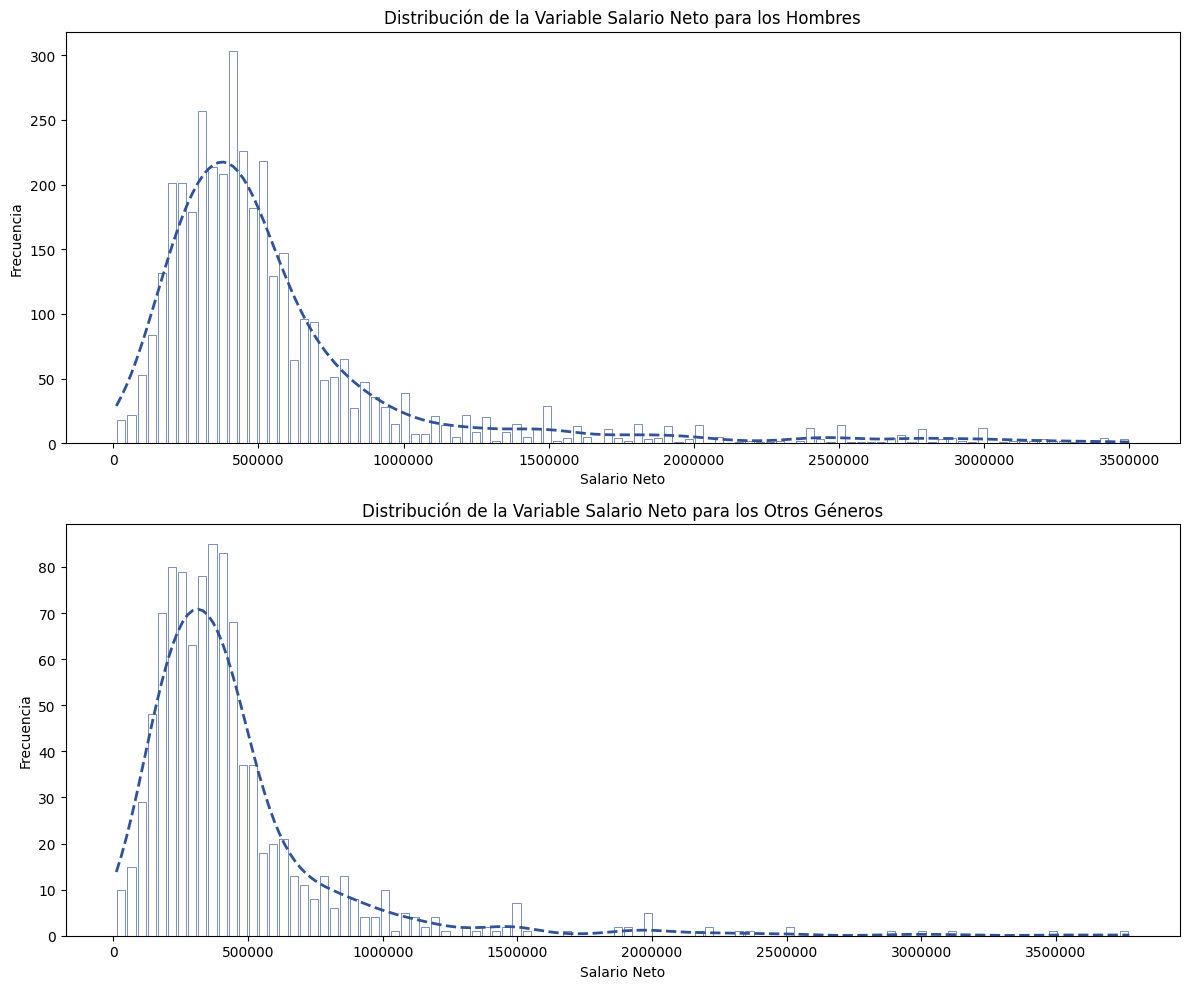

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subplots verticales (uno encima del otro)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))


groupA_filtered = groupA[groupA <= 3500000]
# Primer gráfico - Hombres
sns.histplot(data=groupA_filtered,
             bins=100,
             shrink=0.8,
             stat="count",
             color="#4863A0",
             fill=False,
             kde=True,
             line_kws={'linestyle':'dashed', 'linewidth':'2'},
             ax=ax1
            ).lines[0].set_color('#2F539B')

ax1.set_title("Distribución de la Variable Salario Neto para los Hombres")
ax1.ticklabel_format(style='plain', axis='x')
ax1.set_xlabel("Salario Neto")
ax1.set_ylabel("Frecuencia")

# Segundo gráfico - Otros géneros
sns.histplot(data=groupB,
             bins=100,
             shrink=0.8,
             stat="count",
             color="#4863A0",
             fill=False,
             kde=True,
             line_kws={'linestyle':'dashed', 'linewidth':'2'},
             ax=ax2
            ).lines[0].set_color('#2F539B')

ax2.set_title("Distribución de la Variable Salario Neto para los Otros Géneros")
ax2.ticklabel_format(style='plain', axis='x')
ax2.set_xlabel("Salario Neto")
ax2.set_ylabel("Frecuencia")

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar la figura
plt.show()

In [ ]:
# Create a DataFrame for seaborn
temp_data = pd.DataFrame({
    'values': groupA.tolist() + groupB.tolist(),
    'group': ['Group A'] * len(groupA) + ['Group B'] * len(groupB)
})

fig = px.box(temp_data , x="group", y='values', points="all",color="group")
fig.show()

Por TCL sabemos que, para un $n_1$ grande, $\overline{X} \approx N(\mu_X, \frac{\sigma^2_X}{n_1})$. La varianza la podemos encontrar gracias a la propiedad $V(cA)=c^2V(A) \implies V(\overline{X}) = V(\frac{1}{n_1}\sum X_i)=\frac{1}{n_1^2}\sum V(X_i) = \frac{n_1 \sigma_X^2}{n_1^2} = \frac{\sigma_X^2}{n_1}$. Considerar como dijimos más arriba que la varianza de las $X_i$ es $\sigma_X^2$ y que la varianza de la suma es la suma las varianzas.

De la misma manera obtenemos que $\overline{W} \approx N(\mu_W, \frac{\sigma^2_W}{n_2})$, luego, por propiedades de la distribución normal tenemos que:
$$\overline{X}-\overline{W}\approx N(\mu_X-\mu_W, \frac{\sigma^2_X}{n_1}+\frac{\sigma^2_W}{n_2})$$

Recordemos que **el error estándar es una desviación estándar, pero no de los datos individuales, sino de una distribución teórica o real: la distribución muestral de un estadístico (como la media)**. Si pudiésemos tomar infinitas muestras del mismo tamaño de una población y calcular la media de cada una, la desviación estándar de todas esas medias muestrales sería el verdadero error estándar de la media. Como no podemos hacer esto, usamos la fórmula con la desviación estándar de nuestra muestra para estimar ese error estándar.

En esencia, **la desviación estándar describe la variabilidad dentro de un conjunto de datos (ya sea una muestra o una población)**, mientras que **el error estándar describe la variabilidad entre las estimaciones de un parámetro poblacional obtenidas de diferentes muestras**. El error estándar cuantifica cuánto "error" probable hay en nuestra estimación debido a que solo trabajamos con una muestra y no con toda la población.

En nuestro caso entonces, el error estándar es: $\sqrt{\frac{\sigma^2_X}{n_1}+\frac{\sigma^2_W}{n_2}}$, sin embargo, como no conocemos la varianza debemos estimarla también. El estimador de la varianza es: $S^2 = \frac{1}{n-1}\sum_{i=1}^n(X_i - \overline{X})^2$, la $S$ en mayúsculas porque se trata de una variable aleatoria en este caso, en cambio $s^2$ es el valor concreto calculado con la muestra. El error estándar que nos queda es:

$$SE = \sqrt{\frac{s^2_X}{n_1}+\frac{s^2_W}{n_2}}$$

In [ ]:
# Error estándar de la diferencia
se_diff = np.sqrt((x_std**2 / x_len) + (w_std**2 / w_len))
se_diff

np.float64(16683.081880622452)

- Como tenemos un tamaño de muestra grande, 3806 hombres y 986 de otros géneros, podríamos utilizar el hecho de que la resta de las medias muestrales tendrá distribución normal para calcular el IC.
- Sin embargo, como las varianzas son desconocidas, deberíamos usar la distribución t de Student, que corrige la incertidumbre al estimar las varianzas.
- Pero para la prueba t de Student estándar (pooled t-test) se construye un estadístico T, este método requiere que las varianzas poblacionales de ambos grupos sean iguales ($\sigma_X^2=\sigma_W^2$, **homocedasticidad**) para poder "agrupar" (pool) las varianzas muestrales y calcular un único estimador de la varianza común. que asume varianzas iguales:
$$T = \frac{\overline{X}-\overline{W}}{\sqrt{S_p^2(\frac{1}{n_1}+\frac{1}{n_2})}}, \ \text{donde } \ S_p^2=\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}$$
- En nuestro caso, no podemos asumir que las varianzas sean iguales para ambos grupos, podríamos realizar tests intentando comprobarlo. Si consideramos que las varianzas no son iguales podemos recurrir a la prueba t de Welch en la cual No se agrupan las varianzas, se calcula un error estándar ajustado usando las varianzas individuales de cada grupo y los grados de libertad se aproximan con la fórmula de Welch-Satterthwaite:
$$T = \frac{\overline{X}-\overline{W}}{\sqrt{\frac{S^2_X}{n_1}+\frac{S^2_W}{n_2}}}, \ \text{donde } \ S_p^2=\frac{(n_1-1)S_1^2+(n_2-1)S_2^2}{n_1+n_2-2}$$

**Nota I: Por qué no se puede utilizar la normal cuando las varianzas son desconocidas?**

Cuando se sustituye $\sigma^2$ por $S^2$, es estadístico ya no es Z sino T, que sigue una distribución t de Student. La razón es que $S^2$ es un estimador de $\sigma^2$ y su variabilidad afecta a la distribución de la diferencia de medias, la distribución t tiene colas más pesadas para que la normal para corregir esta incertidumbre.

Sin embargo, en la práctica, con tamaños muestrales muy grandes, los resultados usando $t$ y $Z$ son casi idénticos; para $n=1000$, el valor crítico de $t$ con $\alpha=0.05$ es $\approx 1.96$, igual que para la normal. **Aunque técnicamente la distribución $t$ es la correcta.**

**Nota II: comentarios acerca del estadístico del pivote para la prueba t**

El pivote del estadístico T en su forma general es:
$$T = \frac{\overline{X}-\overline{W}-(\mu_X-\mu_W)}{S_p\sqrt{(\frac{1}{n_1}+\frac{1}{n_2})}} \sim t_{n_1+n_2-2}$$

**El que está escrito más arriba es el que utiliza para una prueta t asumiendo que $\mu_X=\mu_W=0$**. Luego para despejar el intervalo de confianza tenemos que:

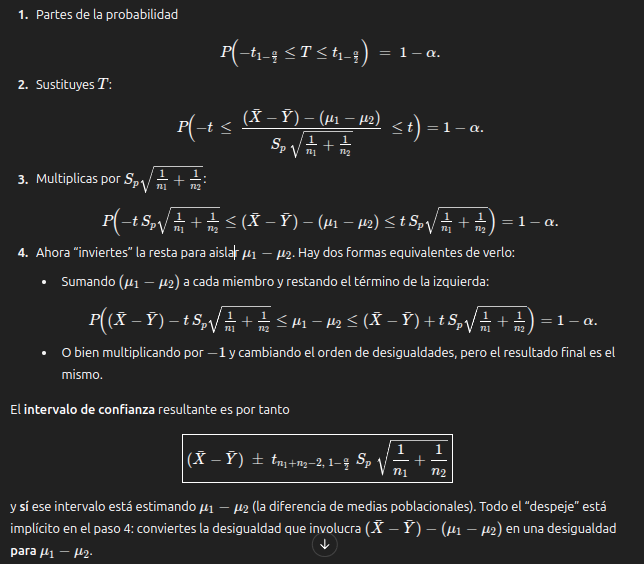


POR LO EXPUESTO ANTERIORMENTE, EXPLORAREMOS LAS 3 OPCIONES:

IC CONSTRUIDO A PARTIR DE UNA NORMAL

In [ ]:
from scipy import stats

def confidence_interval_diff_means(diff_means, std_err, alpha=0.05):
    """
    Calculates the confidence interval for the difference of means using a normal distribution.

    Args:
        diff_means: The difference of means.
        std_err: The standard error of the difference of means.
        alpha: The significance level (default is 0.05).

    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """

    z_critical = stats.norm.ppf(1 - alpha / 2)
    lower_bound = diff_means - z_critical * std_err
    upper_bound = diff_means + z_critical * std_err
    return lower_bound, upper_bound

alpha = 0.05

lower, upper = confidence_interval_diff_means(diff_medias, se_diff, alpha)
print(f"Confidence Interval: ({lower:.2f}, {upper:.2f})")


Confidence Interval: (136660.41, 202056.89)


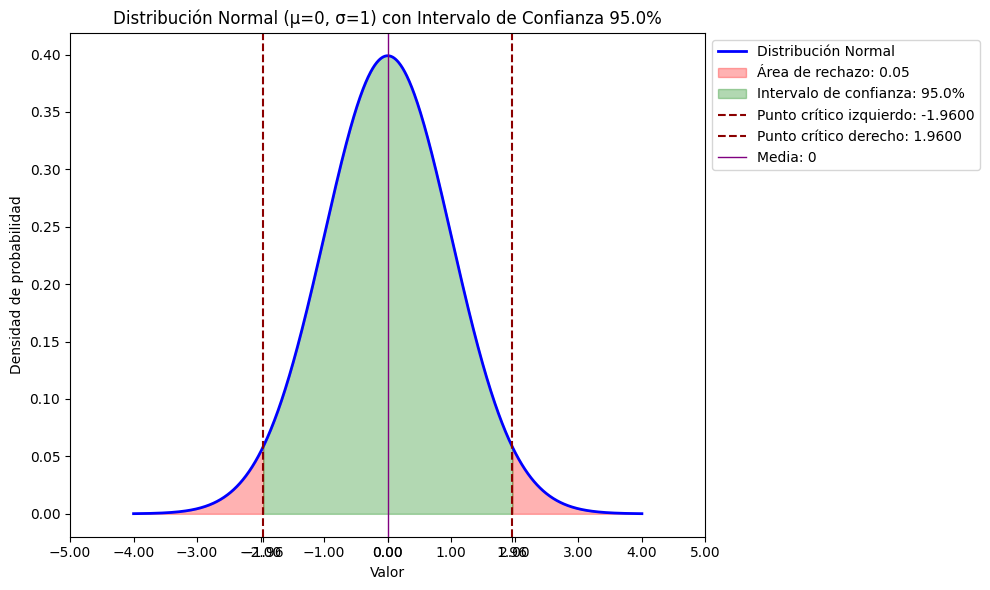

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def graficar_distribucion_normal(alpha=0.1, mu=0, sigma=1, figsize=(10, 6)):
    """
    Grafica una distribución normal con media mu y desviación estándar sigma,
    mostrando los puntos críticos y el área del intervalo de confianza según alpha.

    Parameters:
    -----------
    alpha : float, opcional
        Nivel de significancia (por defecto 0.1 para un intervalo de confianza del 90%)
    mu : float, opcional
        Media de la distribución normal (por defecto 0)
    sigma : float, opcional
        Desviación estándar de la distribución (por defecto 1)
    figsize : tuple, opcional
        Tamaño de la figura (por defecto (10, 6))

    Returns:
    --------
    fig, ax : objetos de matplotlib
        La figura y el eje con la gráfica
    """
    # Crear la figura y el eje
    fig, ax = plt.subplots(figsize=figsize)

    # Calcular los puntos críticos
    z_critical_left = stats.norm.ppf(alpha / 2, loc=mu, scale=sigma)
    z_critical_right = stats.norm.ppf(1 - alpha / 2, loc=mu, scale=sigma)

    # Crear un rango de valores para graficar la curva normal
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
    y = stats.norm.pdf(x, loc=mu, scale=sigma)

    # Graficar la distribución normal
    ax.plot(x, y, 'b-', linewidth=2, label='Distribución Normal')

    # Sombrear el área de rechazo (fuera del intervalo de confianza)
    x_left = np.linspace(mu - 4*sigma, z_critical_left, 100)
    x_right = np.linspace(z_critical_right, mu + 4*sigma, 100)

    ax.fill_between(x_left, stats.norm.pdf(x_left, loc=mu, scale=sigma),
                    color='red', alpha=0.3, label=f'Área de rechazo: {alpha}')
    ax.fill_between(x_right, stats.norm.pdf(x_right, loc=mu, scale=sigma),
                    color='red', alpha=0.3)

    # Sombrear el área de confianza (dentro del intervalo)
    x_conf = np.linspace(z_critical_left, z_critical_right, 100)
    ax.fill_between(x_conf, stats.norm.pdf(x_conf, loc=mu, scale=sigma),
                    color='green', alpha=0.3,
                    label=f'Intervalo de confianza: {100*(1-alpha)}%')

    # Marcar los puntos críticos con líneas verticales
    ax.axvline(x=z_critical_left, color='darkred', linestyle='--', linewidth=1.5,
               label=f'Punto crítico izquierdo: {z_critical_left:.4f}')
    ax.axvline(x=z_critical_right, color='darkred', linestyle='--', linewidth=1.5,
               label=f'Punto crítico derecho: {z_critical_right:.4f}')

    # Añadir línea vertical en la media
    ax.axvline(x=mu, color='purple', linestyle='-', linewidth=1,
               label=f'Media: {mu}')

    # Añadir etiquetas y título
    ax.set_xlabel('Valor')
    ax.set_ylabel('Densidad de probabilidad')
    ax.set_title(f'Distribución Normal (μ={mu}, σ={sigma}) con Intervalo de Confianza {100*(1-alpha)}%')

    # Añadir valores numéricos en los ejes x para los puntos críticos
    plt.xticks(np.append(plt.xticks()[0], [z_critical_left, z_critical_right, mu]))

    # Añadir leyenda fuera del gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

    # Ajustar layout
    plt.tight_layout()

    return fig, ax


# Crear gráfica con valores predeterminados (alpha=0.1)
fig, ax = graficar_distribucion_normal(alpha=0.05)
plt.show()

IC A PARTIR DE T DE STUDENT

In [ ]:
df_t = x_len + w_len - 2
df_t

4790

In [ ]:
t_crit = stats.t.ppf(1 - alpha / 2, df_t)
t_crit

np.float64(1.96045936253376)

In [ ]:
pooled_variance = ((x_len - 1) * x_std**2 + (w_len - 1) * w_std**2) / (x_len + w_len - 2)
pooled_variance

396851275741.5034

In [ ]:
se_t = np.sqrt(pooled_variance * (1/x_len + 1/w_len))
se_t

np.float64(22511.241423391395)

In [ ]:
margen_error = t_crit * se_t
margen_error

np.float64(44132.374010745465)

In [ ]:
ic_inferior = diff_medias - margen_error
ic_superior = diff_medias + margen_error
print(f"Intervalo de confianza al {100*(1-alpha)}%: ({ic_inferior:.2f}, {ic_superior:.2f})")

Intervalo de confianza al 95.0%: (125226.28, 213491.02)


IC A PARTIR DE T DE WELCH

In [ ]:
# Grados de libertad (aproximación de Welch)
df = ((x_std**2 / x_len + w_std**2 / w_len)**2) / (((x_std**2 / x_len)**2 / (x_len - 1)) + ((w_std**2 / w_len)**2 / (w_len - 1)))
df

2666.125130766945

In [ ]:
# Valor crítico para el intervalo de confianza
t_crit = stats.t.ppf(1 - alpha / 2, df)
t_crit

np.float64(1.9608541641548531)

In [ ]:
# Margen de error
margen_error = t_crit * se_diff
margen_error

np.float64(32713.090576554914)

In [ ]:
# Intervalo de confianza
ic_inferior = diff_medias - margen_error
ic_superior = diff_medias + margen_error
print(f"Intervalo de confianza al {100*(1-alpha)}%: ({ic_inferior:.2f}, {ic_superior:.2f})")

Intervalo de confianza al 95.0%: (136645.56, 202071.74)


### ¿Cómo se relaciona este intervalo de confianza con el test de hipótesis?

El intervalo de confianza me permite estimar entre que valores puede estar mi parámetro de interés. En particular el intervalo de confianza para la diferencia de medias puede utilizarse para elaborar un test de hipótesis. Por ejemplo, si quisera saber si las medias de cada grupo son diferentes podría plantear que la diferencia de medias es igual a cero, $\mu_X-\mu_W = 0$, de esta manera el intervalo de confianza proporciona un rango de valores plausibles para la diferencia de medias, y si este rango incluye el valor hipotético bajo la hipótesis nula, no rechazamos esa hipótesis. Si no lo incluye, la rechazamos.


## Ejercicio 2: Test de hipótesis


### 2.1 Formalización

Describir formalmente los distintos componentes de un test de hipótesis para comprobar si la distribución de los salarios es distinta entre los grupos A y B.

**Hipótesis Nula**

$H_0:$

**Estadístico (Pivote)**
  * Identificar el estadístico
  * Escribir qué distribución tiene bajo $H_0$


- "Una de las pruebas más comunes y apropiadas para comparar dos distribuciones independientes es la prueba de Mann-Whitney U (también conocida como prueba de Wilcoxon rank-sum)."
- "test de Kolmogorov–Smirnov bilateral (un test no paramétrico de igualdad de distribuciones)."
- O tenemos que usar una prueba t con la diferencia de medias igual a 0?

### 2.2 P-valor

1. Calcule el p-valor y decida si rechazar o no la hipótesis nula.
2. Interprete el resultado.

Links útiles:
* [Test de hipótesis usando scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
* [Test de Welch](http://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)

### [Opcional] 2.3 Potencia del test

Nuestra muestra, ¿era lo suficientemente grande para detectar si existe o no una diferencia entre los grupos?

1. Utilice la función `tt_ind_solve_power` para calcular el tamaño necesario de la muestra para un poder estadístico de 0.8, 0.9 y 0.95, asumiendo una significancia estadística de 0.05.
2. ¿Cómo intepretan el poder estadístico de un test? Dado su conocimiento de dominio sobre los datos, ¿les parece que esta muestra es lo suficientemente grande para ser representativo de la tendencia general? ¿y para utilizarlo en un juicio penal contra una empresa XX por una causa de discriminación?

[Documentación](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.tt_ind_solve_power.html)

NOTA: este análisis debería hacerse ANTES de recolectar los datos.

In [ ]:
from statsmodels.stats.power import tt_ind_solve_power

In [ ]:
effect_size = (groupA.mean() - groupB.mean()) / groupB.std()
# nobs1=None  - What we want to know
alpha = 0.05
ratio = len(groupB) / len(groupA)
power= 0.8

In [ ]:
tt_ind_solve_power(effect_size=effect_size, alpha=alpha,power=power,  ratio=ratio)

208.24591343200413

## Ejercicio 3: Comunicación y visualización

**Consigna:** Seleccionen un resultado que les parezca relevante a partir de alguno de los ejercicios del entregable. Diseñe e implemente una comunicación en base a este mensaje, en un archivo PDF.

Elija las palabras y visualización más adecuada para que la comunicación sea entendible, efectiva y se dapte a UNA de las siguientes situaciones:

1. Una sección en un artículo de difusión a presentar como parte de una organización sin fines de lucro.
No más de 1 página A4 (o dos si los gráficos son muy grandes).
  1. Ejemplo: Alguna de las secciones [Los ecosistemas de emprendimiento de América Latina y el Caribe frente al COVID-19: Impactos, necesidades y recomendaciones](https://publications.iadb.org/es/los-ecosistemas-de-emprendimiento-de-america-latina-y-el-caribe-frente-al-covid-19-impactos-necesidades-y-recomendaciones), por ejemplo la sección *2.2. Reacciones de los emprendedores*.
  2. Ejemplo: Alguna de las secciones de [The state of gender pay gap in 2021](https://www.payscale.com/data/gender-pay-gap?tk=carousel-ps-rc-job)
  3. Puntos clave:
    1. Simpleza de los gráficos.
    2. Comunicación en lenguaje simple a personas que no son necesariamente expertos de dominio.
    2. Selección de UNA oración sobre la que se hace énfasis.
    3. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

2. Una publicación científica o reporte técnico interno. No más de una página A4:
  2. Ejemplo: La sección de resultados de [IZA DP No. 12914: The Impact of a Minimum Wage Change on the Distribution of Wages and Household Income](https://www.iza.org/publications/dp/12914/the-impact-of-a-minimum-wage-change-on-the-distribution-of-wages-and-household-income).
  2. Ejemplo: Alguna de las secciones de [Temporary reduction in daily global CO2 emissions during the COVID-19 forced confinement](https://www.nature.com/articles/s41558-020-0797-x)
  3. Puntos clave:
    3. Nivel de detalle técnico requerido. Es necesario justificar la validez del análisis.
    4. La idea presentada puede ser más compleja. Pueden asumir que la audiencia tiene conocimiento técnico y va a analizar las visualizaciones en detalle.
    5. Pueden presentar más en detalle las limitaciones del análisis (significancia estadística, etc.)
    2. No es necesario que mencionen objetivos ni descripciones del conjunto de datos, se supone que eso ya estaría explicado en otras secciones del informe.

3. Un tweet (o post de LinkedIn) para la cuenta de su empresa consultora que hace análisis de datos. El objetivo es promocionar un análisis de datos abiertos que van a incluir en su portfolio:
  1. Ejemplo: [Comparación vacunas covid](https://twitter.com/infobeautiful/status/1381577746527236098?s=20)
  2. Ejemplo: [Tweet del BID](https://twitter.com/el_BID/status/1388508583944507396?s=20). Lo valioso de este tweet es que usaron un único número para transmitir un mensaje. Puede ser algo así, o con un gráfico muy simple.
  3. Ejemplo: [Cambio climático](https://twitter.com/UNFCCC/status/1387732156190011394?s=20) Es un muy buen ejemplo, excepto que el gráfico no se lee nada y hay que entrar a la publicación original.
  3. Ejemplo: [¿Cuánto están los programadores en las empresas?](https://www.linkedin.com/posts/denis-rothman-0b034043_tech-career-work-activity-6793861923269054464-gS6y) (No verificamos la veracidad o seriedad de la fuente).
  4. Puntos clave:
    1. Su audiencia no va a mirar la visualización por más de unos segundos, y no tiene conocimiento técnico.
  3. Tienen que incluir además una *breve* descripción de cómo obtuvieron los datos que están presentando, que no entraría en el tweet.


# LOS GRÁFICOS QUE ME PARECEN INTERESANTE MEJORAR Y UTILIZAR

In [ ]:
umbral_maximo = 15000000

salary_filtered_df= df[filtered_df['salary_monthly_NETO'] < umbral_maximo]

fig = px.scatter(
    salary_filtered_df,
    x='salary_monthly_NETO',
    y='profile_years_experience',
    color='profile_studies_level',
    title="Relación entre Salario Neto y Años de Experiencia según Nivel de Estudios",
    labels={
        "salary_monthly_NETO": "Salario Neto",
        "profile_years_experience": "Años de Experiencia",
        "profile_studies_level": "Estudios"
    },
    template="plotly_white"
)

fig.update_traces(marker=dict(size=5))
fig.show()


In [ ]:
fig = px.box(
    salary_filtered_df,
    x='seniority',
    y='salary_monthly_NETO',
    color='profile_studies_level',
    points='all',
    category_orders={
        'seniority': ['Junior', 'Semi-Senior', 'Senior']
    }
)

fig.update_layout(title='Distribución de Salario Neto por Seniority y Nivel de Estudios')
fig.show()


Este grafico permite representar el salario neto mensual (salary_monthly_NETO), jerarquia profesional (seniority) y el nivel de estudios (profile_studies_level). Esto proporciona informacion sobre la mediana, el rango intercuartilico, la dispersion y los valores atipicos (outliers) dentro de cada categoria de experiencia y nivel educativo.
Se observa un aumento progresivo del salatio neto a medida que se avanza en los niveles de seniority, mostrando una relacion positiva entre experiencia profesional y remuneracion. Con respecto a los perfiles junior tienden a presentar distribuciones salariales homogeneas y concentradas en valores bajos, mientras que los niveles mas altos como senior o director tienen mayor dispersion, lo que muestra diversidad en tipos de contratacion, beneficios, etc. Ademas el nivel educativo muestra una influencia, a mayor nivel de estudios se incrementa la mediana salarial, con variaciones dentro de cada grupo.
En todas las categorias se identifican valores atipicos sobre todo en los niveles mas altos.

In [ ]:
#Satisfacción con el Salario:
# 1 = Muy insatisfecho
# 2 = Insatisfecho
# 3 = Satisfecho
# 4 = Muy Satisfecho


fig = px.scatter(
    salary_filtered_df,
    x='salary_monthly_NETO',
    y='profile_years_experience',
    color='salary_satisfaction',
    title="Relación entre Salario Neto y Años de Experiencia según Satisfacción con el Salario",
    labels={
        "salary_monthly_NETO": "Salario Neto",
        "profile_years_experience": "Años de Experiencia",
        "salary_satisfaction": "Satisfacción con el Salario"
    },
    template="plotly_white"
)

fig.update_traces(marker=dict(size=5))
fig.show()

El gráfico muestra que a mayor salario neto y mayor experiencia laboral, aumenta la satisfacción con el salario. Las personas más satisfechas tienden a concentrarse en los rangos más altos de ingresos, lo que sugiere una relación directa entre nivel de remuneración, trayectoria profesional y percepción positiva del salario.

El gráfico de dispersión muestra una relación entre el salario neto mensual y los años de experiencia laboral, donde a mayor experiencia se tienden a observar ingresos más altos. Además, se evidencia una estratificación por nivel educativo: los perfiles con estudios universitarios o de posgrado predominan en los rangos salariales superiores, lo que sugiere que tanto la experiencia como el nivel de estudios influyen en la evolución salarial.